<h1 style="color:#4FC3F7;">1. PRIMER PROYECTO</h1>


<h2 style="color:#81C784;">1.1 Conceptos teóricos</h2>

<h3 style="color:#EF9A9A;">1.1.1 ¿Que se pide?</h3>  
Intenta crear un clasificador para el conjunto de datos MNIST que alcance una precisión superior al 97 % en el conjunto de prueba. 

<h3 style="color:#EF9A9A;">1.1.2 ¿Que es MNIST?</h3>
El conjunto de datos MNIST consiste en 70.000 pequeñas imágenes de dígitos escritos a mano por estudiantes de secundaria y empleados de la Oficina del Censo de EE. UU. Cada imagen está etiquetada con el dígito que representa. Este conjunto se ha estudiado tanto que a menudo se le denomina el "hola mundo" del aprendizaje automático: cada vez que se crea un nuevo algoritmo de clasificación, se siente curiosidad por ver su rendimiento en MNIST, y cualquiera que aprenda aprendizaje automático se enfrenta a este conjunto de datos tarde o temprano.

In [75]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

<h4 style="color:#FFB74D;">1.1.2.1 ¿Qué hace exactamente este código?</h4> 

`from sklearn.datasets import fetch_openml`  
- Importa una función de scikit-learn (abreviado sklearn)
- Esa función sirve para descargar datasets públicos desde OpenML.
OpenML es un repositorio online de datasets estándar para ML.  
  
`fetch_openml('mnist_784', as_frame=False)`  
Esto hace todo esto automáticamente:

1. Busca el dataset llamado mnist_784 en OpenML
2. Lo descarga (si no lo tienes en caché)
3. Lo convierte en un formato usable por Python
4. Te devuelve un objeto con:

    - Datos (X)
    - Etiquetas (y)
    - Metadatos

📌 mnist_784 =  
- MNIST (dígitos escritos a mano)
- 784 = 28 × 28 píxeles por imagen

In [76]:
type(mnist)

sklearn.utils._bunch.Bunch

Es un objeto tipo Bunch, parecido a un diccionario.  
  
Podemos acceder así:

In [77]:
X = mnist.data      # imágenes
y = mnist.target    # etiquetas (0–9)

print(X.shape)  # (70000, 784) (Filas , Columnas)
print(y.shape)  # (70000,)

(70000, 784)
(70000,)


In [78]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [79]:
y

array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object)

<h4 style="color:#FFB74D;">1.1.2.2 ¿Qué es X ?</h4>  

Para nosotros una imagen es “un dibujo”. 

Para la computadora es solo una matriz de números.

Ejemplo: imagen MNIST

    Tamaño real: 28 × 28 píxeles

    Cada píxel = un número entre 0 y 255

    0 → negro

    255 → blanco

Entonces una imagen es:

    28 filas × 28 columnas = 784 números

Cada fila es una imagen aplanada.  
Conceptualmente:  

    [ 0   0   0  12  45  80  ... ]  

    [ 0   0  15  90 140 200  ... ]  

    [ 0  30 120 200 255 230  ... ]  

    [ .   .   .   .   .   .  ... ]

Eso es una matriz 28×28  

Los algoritmos clásicos de ML (KNN, SVM, Regresión) NO entienden matrices 2D.  
Solo entienden vectores.

👉 Entonces la imagen se aplana (flatten):

    28 × 28  →  784 × 1  

Se convierte en una sola fila:

    [0, 0, 0, 12, 45, 80, ..., 34]

  
Entonces… ¿qué es X?

    X = mnist.data

X es una tabla

    Cada fila = una imagen

    Cada columna = un píxel 



    
      
    
Ahora falta un codigo por ver


`as_frame=False`  
- as_frame=False → devuelve arrays de NumPy (ideal para ML clásico)
- as_frame=True → devuelve DataFrames de pandas  

📌 En ML clásico se usa NumPy, por eso casi siempre lo ves en False.

In [80]:
X.shape


(70000, 784)

| Dimensión | Significado        |
| --------- | ------------------ |
| 70000     | imágenes           |
| 784       | píxeles por imagen |


    y NO es una imagen.

Es simplemente la etiqueta de cada imagen.

<h4 style="color:#FFB74D;">1.1.2.3 ¿Qué es sklearn y por qué SIEMPRE aparece?</h4>  
Es la librería estándar de Machine Learning en Python.  

- Es simple
- Está muy bien documentada
- Es consistente (todo se entrena igual)
- Es ideal para aprender ML
- Se usa en industria y academia
  
¿Qué trae scikit-learn?

| Categoría        | Ejemplos                           |
| ---------------- | ---------------------------------- |
| Clasificación    | `KNN`, `SVM`, `RandomForest`       |
| Regresión        | `LinearRegression`, `Ridge`        |
| Clustering       | `KMeans`, `DBSCAN`                 |
| Reducción dim.   | `PCA`                              |
| Preprocesamiento | `StandardScaler`                   |
| Validación       | `train_test_split`, `GridSearchCV` |
| Datasets         | `fetch_openml`, `load_iris`        |


<h4 style="color:#FFB74D;">1.1.2.4 ¿Por qué MNIST se usa tanto?</h4>  
MNIST es como el Hello World del ML:  

- Fácil de entender
- Multiclase (0–9)
- Ideal para clasificación
- Sirve para comparar modelos
  
Por eso casi todos los cursos empiezan con: `fetch_openml("mnist_784")`


<h4 style="color:#FFB74D;">1.1.2.5 ¿Como mostrar un numero del dataset?</h4>  
Sabemos que una fila de X corresponde a la imagen de un numero de 28 x 28 de tamaño, como logaríamos elegir solo una fila y formar la matriz de 28 x 28 con esos valores?  

X es la matriz de numeros. 70,000 filas y 784 columnas. Al elegir X[0] estamos eligiendo la primera fila, ya que X[filas, columnas]. Tal y como se mutesra a continuación

In [81]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [82]:
X[0].shape # Es una fila con 784 columnas

(784,)

Se podría pensar que X[0] es una matriz, PERO NO, es una sola fila. La forma en la que jupyter muestra los valores puede ser confusa.  

Ahora la tarea será transformar esta imagen en una matriz de 28 x 28

El código será el siguiente, pero antes deberemos inicalizar la libreria matplotlib

In [83]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

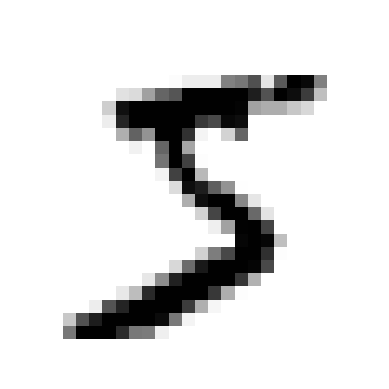

In [84]:
def plot_digit(image_data): # Define una función llamada plot_digit. image_data será UNA imagen, no todo el dataset. En realidad: image_data = un vector de 784 valores
    
    image = image_data.reshape(28, 28) # Convierte el vector 1D en una matriz 2D. 
    # Antes: (784,)
    # Después: (28, 28)
    # “Toma estos 784 números (numeros del vector de imagen) y colócalos en 28 filas, cada una con 28 columnas.”

    plt.imshow(image, cmap="binary")
    # imshow muestra una matriz como imagen
    # cmap="binary". valores bajos → negro. valores altos → blanco
    #  Los valores 0–255 NO “saben” que son blancos o negros.
    #  Eso lo decide el mapa de colores (cmap). Para NumPy y matplotlib: 0 es solo un número, 255 es solo otro número no tienen color asociado

    plt.axis("off")
    # Oculta los ejes
    # Solo queda el número dibujado

some_digit = X[0]
plot_digit(some_digit)

plt.show()

Recordemos que  




In [85]:
X = mnist.data         # imágenes  

y = mnist.target    # etiquetas (0–9)

y

array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object)

ALT + 96 = `  

`y` son los valores de las etiquetas o numeros a los que corresponden cada fila de 784 numeros de 28 x 28. Entonces si yo quisiera la etiqueta a la que corresponde la primera fila de 784 numeros, bastaria con usar la siguiente funcion. 
  
  

In [86]:
y[69999] # 70,000 numeros (contando el 0)

'6'

funcion que nos arroja el numero `5`, el cual es correcto

<h4 style="color:#FFB74D;">1.1.2.6 ¿Como mostrar algunos de los numeros del data set en una sola imagen?</h4>  


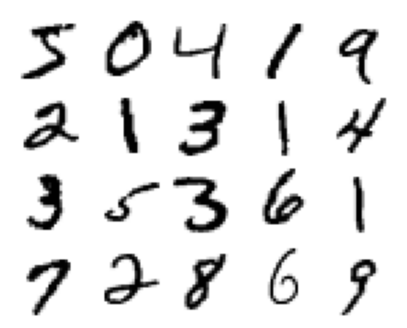

In [87]:
# extra code
plt.figure(figsize=(5, 5)) # Tamaño de la imagen, no influye en los numeros
for idx, image_data in enumerate(X[:20]): # enumerate() recorre una colección (lista, array, etc.). Devuelve (índice, valor)

    # enumerate empieza en idx = 0 y X[0]
    # idx → el índice (posición). image_data → la imagen
    
    # idx = 0  → primera imagen
    # idx = 1  → segunda imagen
    # idx = 2  → tercera imagen
    # ...
    # idx = 99 → imagen número 100

    plt.subplot(5, 5, idx + 1) # plt.subplot(filas, columnas, posicion)
    plot_digit(image_data)

plt.subplots_adjust(wspace=0, hspace=0) # wspace: espacio horizontal entre subplots.
                                        # hspace: espacio vertical entre subplots

plt.show() # Es el punto final del dibujo

El conjunto de datos MNIST devuelto por `fetch_openml()` ya está dividido en un conjunto de entrenamiento (las primeras 60 000 imágenes) y un conjunto de prueba (las últimas 10 000 imágenes).

El conjunto de entrenamiento ya está reorganizado, lo cual es positivo, ya que garantiza que todos los pliegues de validación cruzada sean similares (no queremos que a un pliegue le falten algunos dígitos). Además, algunos algoritmos de aprendizaje son sensibles al orden de las instancias de entrenamiento y su rendimiento es bajo si obtienen muchas instancias similares seguidas. Reorganizar el conjunto de datos garantiza que esto no ocurra.


<h2 style="color:#81C784;">1.2 Análisis previo</h2>

<h3 style="color:#EF9A9A;">1.1.1 ¿Que es un clasificador?</h3>
Tipos de problemas donde el objetivo es predecir un objetivo que puede tomar un conjunto finito de valores.

Ejemplos de problemas de clasificación:

- Predecir el tipo de iris (setosa, versicolor, virginica) a partir de las medidas de sus pétalos y sépalos.
- Predecir si los pacientes padecen una enfermedad específica a partir de los resultados de sus pruebas médicas.

Cuando la etiqueta predicha puede tener dos valores, se denomina clasificación binaria. Este es el caso de los casos de uso médicos y de spam mencionados anteriormente.

Cuando la etiqueta predicha puede tener al menos tres valores, se denomina clasificación multiclase. Este es el caso del caso de uso de iris mencionado anteriormente.

(Scikit-learn MOOC Team. (2025). Classifier — scikit-learn glossary. https://inria.github.io/scikit-learn-mooc/appendix/glossary.html#classification
)


<h3 style="color:#EF9A9A;">1.1.3 Clasificadores que usaremos</h3>


<h4 style="color:#FFB74D;">1.1.3.1 SGDClassifier (clasificador lineal)</h4>  


<span style="color:#FFEB3B; font-weight:bold;">
Definición formal
</span>

Los clasificadores lineales aprenden un vector de peso 𝑤 y un sesgo b tal que la regla de decisión
$$
w^T x + b > 0
$$
separa las clases.

SGDClassifier:

- Aprende una ecuación
- Ajusta pesos usando gradiente descendente
- La frontera es una línea (o hiperplano)

Este clasificador tiene la ventaja de ser capaz de gestionar conjuntos de datos muy grandes de forma eficiente. Esto se debe, en parte, a que SGD gestiona las instancias de entrenamiento de forma independiente, una a la vez (lo que también lo hace ideal para el aprendizaje en línea).

*Géron – Hands-On Machine Learning* y *https://www.cs.toronto.edu/~rgrosse/courses/csc311_f20/readings/L03a%20Linear%20Classifiers.pdf*


<span style="color:#FFEB3B; font-weight:bold;">
Definición didactica
</span>

SGD piensa así: “Voy a encontrar una sola regla matemática que separe las clases.” Algo así:

- si  x1 + x2 > 10 → clase 1
- si no            → clase 0


<span style="color:#FFEB3B; font-weight:bold;">
Código sencillo
</span>

Vamos a clasificar personas en:

- 0 → persona baja
- 1 → persona alta

Usando una sola característica: altura.

In [88]:
import numpy as np

# Alturas (en cm)
a = np.array([[150], [155], [160], [180], [185], [190], [200]])

# Etiquetas
b = np.array([0, 0, 0, 1, 1, 1,1])


Esto quiere decir que:
- 150, 155, 160 → bajos
- 180, 185, 190 → altos

Un clasificador es algo que aprende una forma de decidir:

“Si veo un número nuevo… ¿es bajo o alto?”

Este clasificador dice:

**“Voy a encontrar una regla matemática simple
para separar bajos de altos.”**

Por ejemplo:

- si altura > 170 → alto
- si no → bajo


In [89]:
from sklearn.linear_model import SGDClassifier

modelo = SGDClassifier(max_iter=1000) 
modelo.fit(a, b)

print(modelo.predict([[150]]))  # ¿bajo o alto?
print(modelo.predict([[185]]))

[1]
[1]


1. Mira los datos
2. Prueba reglas
3. Ajusta la regla hasta equivocarse poco
4. Guarda una fórmula

Siempre usa esa misma fórmula. 

Si los datos son raros o curvos: Una sola línea NO alcanza

<h4 style="color:#FFB74D;">1.1.3.2 KNeighborsClassifier (KNN)</h4>  


<span style="color:#FFEB3B; font-weight:bold;">
Definición formal
</span>

El algoritmo de k-nearest neighbors (KNN) es un clasificador de aprendizaje supervisado no paramétrico, que emplea la proximidad para realizar clasificaciones o predicciones sobre la agrupación de un punto de datos individual. Es uno de los clasificadores de clasificación y regression más populares y sencillos que se emplean actualmente en machine learning.

Si bien el algoritmo KNN se puede usar para problemas de regresión o clasificación, generalmente se usa como un algoritmo de clasificación, partiendo del supuesto de que se pueden encontrar puntos similares cerca uno del otro.

*(https://www.ibm.com/mx-es/think/topics/knn)*

Características:

- No aprende fórmula
- Usa distancia
- Clasifica por voto

<span style="color:#FFEB3B; font-weight:bold;">
Definición didáctica
</span>

**KNN piensa así:**

- “No voy a aprender nada ahora. Cuando llegue un punto nuevo, miraré a quién se parece más.”

**Ejemplo humano:**

- Nuevo número escrito a mano
- Lo comparas con otros parecidos
- Decides por mayoría


<span style="color:#FFEB3B; font-weight:bold;">
Código sencillo
</span>

In [90]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(a, b) 

# a = np.array ( [ [150] , [155] , [160] , [180] , [185] , [190] ] )
# b = np.array( [0, 0, 0, 1, 1, 1] )


print(knn.predict([[165]]))
print(knn.predict([[185]]))


[0]
[1]


**Paso a paso. Para 165:**

**1**. Busca las 3 alturas más cercanas: (*n_neighbors=3*)

- 160 → bajo
- 155 → bajo
- 180 → alto

**2**. Votación:

- 2 bajos
- 1 alto

**3**. Resultado → bajo

- No hay fórmula
- No hay entrenamiento real
- Solo comparación

<h4 style="color:#FFB74D;">1.1.3.3 DUMMYCLASSIFIER</h4>  


<span style="color:#FFEB3B; font-weight:bold;">
Definición didactica
</span>

Dummy dice:

- “Siempre diré la clase más común.”

<span style="color:#FFEB3B; font-weight:bold;">
Código sencillo
</span>

In [91]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(a, b)

# a = np.array ( [ [150] , [155] , [160] , [180] , [185] , [190], [200]] )
# b = np.array( [0, 0, 0, 1, 1, 1, 1] )

print(dummy.predict([[165]]))


[1]


<h2 style="color:#81C784;">1.3 Procedimiento previo</h2>

<h3 style="color:#EF9A9A;">1.3.1 Separaremos del data set las primeras 100 imagenes </h3>


In [92]:
X[0] # Fila de 784 numeros que forma una imagen de 28 x 28 pixeles. No olvidar

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [93]:
X_small = X[:100]   # primeras 100 imágenes
y_small = y[:100]   # sus etiquetas

<h4 style="color:#FFB74D;">1.3.1.1 CLASIFICADOR 1: DUMMY (REFERENCIA)</h4>  


Haremos un modelo tonto que haga predicciones simples, veamos que conclusion sacamos

In [94]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent") # "most_frequent" = siempre predice la clase más frecuente en el conjunto de entrenamiento de y_small

# y_small = [1, 1, 1, 3, 5, 1]
# clase más frecuente = 1

dummy.fit(X_small, y_small)

# Mira SOLO y_small
# Cuenta cuántas veces aparece cada etiqueta
# Guarda internamente la etiqueta más frecuente
# no aprende píxeles

dummy.score(X_small, y_small) # score = accuracy = exactitud = aciertos / total

# El X_small solo se usa para contar el numero de filas totales (100)

# Debemos ejecutar dummy.fit() antes de usar dummy.score()
# Si no lo hacemos, el modelo no sabe qué predecir.


0.14

0.14 = 14%

Eso significa que:
- El Dummy acertó 14 de 100 imágenes
- Falló en 86

**¿Pero qué acertó?**

Para saber el número, usaremos el siguiente código:

In [95]:
y_small = y_small.astype(int) # y_small NO está en formato int puro, con este codigo lo cambiamos. Así podemos usar np.bincount

aciertos = np.bincount(y_small)
aciertos

array([13, 14,  6, 11, 11,  5, 11, 10,  8, 11])

El número que acerto fue el **1** dado que se repite **14 veces**

**CONCLUSION** : Este modelo predice la clase más frecuente en el conjunto de datos. 

Dice: “No miro la imagen. Siempre digo el número que más se repite.”

- Accuracy baja
- No aprende
- Solo sirve como línea base

<h4 style="color:#FFB74D;">1.3.1.2 CLASIFICADOR 2: SGDClassifier (LINEAL)</h4>  
SGD intentará encontrar UNA sola ecuación matemática que separe TODOS los dígitos.

In [96]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42) # random_state=42 para reproducibilidad. Controla la aleatoriedad interna. No afecta qué tan bueno es el modelo, solo consistencia.
sgd.fit(X_small, y_small)

# 1. Usa X_small y y_small
# 2. Inicializa pesos
# 3. Ajusta pesos con descenso por gradiente
# 4. Recorre los datos varias veces
# 5. Aprende una frontera de decisión

# A diferencia del Dummy:
# - X_small sí importa, cada pixel influye en el modelo

sgd.score(X_small, y_small)

# 1. predice etiquetas
# 2. las compara con y_small
# 3. devuelve la accuracy

d:\3\SIAFI\XD\SIAFI-2026-1-main\ML\Entorno_ML\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:733: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


1.0

**Problema real** :
- Los dígitos:
    - son curvos
    - se superponen
    - no se separan con líneas

Por eso SGD falla en MNIST

<h4 style="color:#FFB74D;">1.3.1.3 CLASIFICADOR 3: KNeighborsClassifier</h4>
Cuando llega una imagen nueva, KNN:

- Busca imágenes parecidas
- Mira sus etiquetas
- Vota

In [97]:
from sklearn.neighbors import KNeighborsClassifier # Es un método basado en similitud, no en fórmulas.

knn = KNeighborsClassifier(n_neighbors=3) # n_neighbors=3 → “Para clasificar una imagen, miraré las 3 más cercanas”
knn.fit(X_small, y_small)

# Aquí no entrena como SGD, sino que:
# a. Guarda todas las imágenes X_small
# b. Guarda sus etiquetas y_small"

# - No ajusta pesos
# - No aprende una fórmula
# - Solo memoriza el dataset

knn.score(X_small, y_small)

# - Para cada imagen de X_small:

    # 1. calcula distancias a todas las demás
    # 2. elige las 3 más cercanas
    # 3. vota

# - Compara con la etiqueta real
# - Devuelve la accuracy


0.87

**Ejemplo** : 

“Esta imagen se parece a 3 imágenes que eran `7` y a 0 que eran `3`  →  digo 7”

- No usa fórmulas
- Usa similitud
- Ideal para imágenes

<h3 style="color:#EF9A9A;">1.3.2 VER CÓMO UN CLASIFICADOR PREDICE UNA IMAGEN (UNA POR UNA) </h3>
Hasta ahora hicimos esto:

- Entrenamos modelos
- Vimos accuracy
- Pero no hemos visto qué predicen realmente

Ahora vamos a responder esta pregunta clave:

- Cuando le doy UNA imagen al modelo… ¿qué hace exactamente?


<h4 style="color:#FFB74D;">1.3.2.1 IMAGEN DE PRUEBA</h4>
Tomemos una imagen que NO esté en el entrenamiento, por ejemplo la número 101:


Etiqueta real: 7


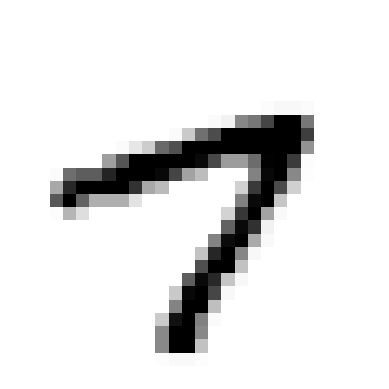

In [98]:
test_image = X[101]
true_label = y[101]

print("Etiqueta real:", true_label)
plot_digit(test_image)
plt.show()


- es un vector (784,)
- representa un dígito real
- el modelo NO sabe la respuesta

<h4 style="color:#FFB74D;">1.3.2.2 CLASIFICADOR 1: DUMMY PREDICE UNA IMAGEN</h4>


In [99]:
dummy.predict([test_image])


array(['1'], dtype='<U1')

- [`test_image`] → forma (1, 784)
- siempre debes pasar muchas filas, aunque sea una

**Dummy ignora la imagen** : Siempre devuelve la clase más común. OSEA 1

<h4 style="color:#FFB74D;">1.3.2.3 CLASIFICADOR 2: SGD PREDICE UNA IMAGEN</h4>


In [100]:
sgd.predict([test_image])

array([7])

**¿Qué hace SGD aquí?**
- Aplica su ecuación lineal
- Calcula puntuaciones
- Elige la clase con mayor score

**Resultado** :
- puede acertar
- puede fallar
- no entiende bien curvas ni trazos

<h4 style="color:#FFB74D;">1.3.2.4 CLASIFICADOR 3: KNN PREDICE UNA IMAGEN</h4>


In [101]:
knn.predict([test_image])


array([7])

**¿Qué hace KNN aquí?**

1. Compara esta imagen con las 100 imágenes guardadas
2. Busca las más parecidas
3. Mira sus etiquetas
4. Vota

Aquí suele hacerlo mejor que SGD

<h4 style="color:#FFB74D;">1.3.2.5 Una pregunta que no me deja tranquilo</h4>


- X[101] es solo un vector plano de 784 números entre 0 y 255
- NO es una imagen “dibujada”, es una imagen codificada

**Una imagen MNIST es esto** :

- Tamaño: 28 × 28 píxeles
- Cada píxel: un número entre 0 (negro) y 255 (blanco)

**Pero la computadora ve esto** :

- Ese cuadrado se aplana (flatten): [ p1, p2, p3, ..., p784 ]

Eso es exactamente X[101]

**¿Por qué NO se pasa como imagen 2D al clasificador?** :

Porque:

- Los clasificadores matemáticos trabajan con vectores
- Cada imagen = un punto en un espacio de 784 dimensiones

Piensa así:

- Cada imagen es una coordenada gigante
- Cada píxel es una dimensión

**¿CÓMO puede predecir algo un vector plano?** :

Vamos clasificador por clasificador




<span style="color:#FFEB3B; font-weight:bold;">
KNN — “comparación por similitud”
</span>

**Idea central** : 

Las imágenes parecidas tienen números parecidos

**¿Qué hace KNN con X[101]?**

1. Toma ese vector de 784 valores
2. Lo compara con TODAS las imágenes de entrenamiento
3. Calcula una distancia (generalmente euclidiana):

$$
\text{distancia} =
\sqrt{
\sum_{i=1}^{784}
\left(x_i - x_i^{(\text{train})}\right)^2
}
$$

Entonces:
- Compara píxel por píxel
- Si dos imágenes tienen intensidades similares → distancia pequeña

**Ejemplo simple (solo 3 píxeles)**

- X[101] = [0, 0, 255]
- Imagen A = [0, 10, 250]  → MUY PARECIDA
- Imagen B = [255, 0, 0]   → MUY DIFERENTE

KNN dirá: `“X[101] se parece más a A, así que su etiqueta es la misma”`

**Conclusión final de KNN**

- Mira los K vecinos más cercanos
- Hace votación
- Gana el número más repetido

Nunca “entiende” la imagen, solo compara intensidades



<span style="color:#FFEB3B; font-weight:bold;">
SGDClassifier — “modelo matemático aprendido”
</span>

Aquí cambia TODO.

**¿Qué aprende SGD?**

Aprende una ecuación matemática:
$$
\text{score} = w_1 x_1 + w_2 x_2 + \cdots + w_{784} x_{784} + b
$$

- Cada píxel tiene un peso
- Algunos píxeles importan más que otros

**Interpretación física**

Piensa así:

- El modelo aprende que “este píxel oscuro aquí es típico de un 1” “este píxel brillante aquí es típico de un 0”

Ejemplo:

- Centro vertical brillante → probable 1
- Bordes brillantes → probable 0

**¿Cómo predice con X[101]?**

1. Multiplica cada píxel por su peso
2. Suma todo
3. Decide qué número tiene mayor puntuación

- No compara imágenes
- Evalúa una fórmula

<span style="color:#FFEB3B; font-weight:bold;">
CONCLUSIONES CLAVES
</span>

Al momento de usar los comandos:

`knn.predict([test_image])` y `sgd.predict([test_image])`se esta haciendo uso de la variable "test_image", el cual es un vector de 784 valores de que estan formados por numeros que van del 0 al 255, en este caso es X[101]. 

¿Al usar el comando de `predict`, estamos teniendo "acceso" a todos los demas 70 mil vectores de numeros del data set?

LA RESPUESTA ES SÍ

Cuando hacemos predict(test_image) el modelo usa la información que aprendió o almacenó de TODO el dataset de entrenamiento.

**¿Qué pasa ANTES de predict? (ETAPA CRÍTICA)**
Todo inica aquí:

In [102]:
sgd.fit(X_small, y_small)
knn.fit(X_small, y_small)

d:\3\SIAFI\XD\SIAFI-2026-1-main\ML\Entorno_ML\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:733: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


**KNN en fit()**

¿Qué hace KNN al entrenar?

- ABSOLUTAMENTE NADA matemático

Solo guarda los datos:

- X_small → 100 vectores de 784 números
- y_small → 100 etiquetas

**SGD en fit()**

Aquí sí ocurre aprendizaje:

- Ajusta los pesos del modelo:

    - w1, w2, ..., w784, b


Después de entrenar, SGD ya no necesita los 70,000 vectores



**Ahora sí, que pasa en predict(test_image)?**

- CASO 1: `knn.predict([test_image])`

    - ¿Tiene acceso a los 70,000 vectores? : 
    
    SÍ, TODOS. Porque KNN los guardó en memoria en el fit().

    - ¿Qué hace exactamente? : 

    Internamente:

    1. Toma test_image (vector 784)
    2. Calcula la distancia con cada fila de X_train:

            distancia(test_image, X_small[0])
            distancia(test_image, X_small[1])
            distancia(test_image, X_small[2])
            ...
            distancia(test_image, X_small[69999])

        70,000 comparaciones

    - Luego:

        - Ordena las distancias
        - Toma los K más cercanos
        - Mira sus etiquetas
        - Hace votación

        AHÍ está la comparación
    
 - CASO 2: `sgd.predict([test_image])`
    
    - ¿Tiene acceso a los 70,000 vectores? : 
    
    NO, YA NO LOS NECESITA

    - Entonces… ¿con qué compara?

        Con sus pesos aprendidos. Cuando hacemos `predict`:
    $$
    \text{score}_k = \mathbf{w}_k \cdot \mathbf{x} + b_k
    $$
    Para cada clase (0–9)

    - Internamente:

            score_0 = w_0 · test_image + b_0
            score_1 = w_1 · test_image + b_1
            ...
            score_9 = w_9 · test_image + b_9
    
        NO compara con imágenes. Compara con modelos abstractos

- Resumen:

    -  NO compara con imágenes
    -  Compara con modelos abstractos

    - KNN memoriza el dataset y compara directamente.
    - SGD aprende una regla y luego ya no necesita los datos.

    Por eso:

    - KNN es lento al predecir
    - SGD es rapidísimo
    - KNN necesita muchísima RAM
    - SGD escala mejor




<h3 style="color:#EF9A9A;">1.3.3 MEJORAR RESULTADOS (DE ENTENDER → A RENDIR BIEN) </h3>


<h4 style="color:#FFB74D;">1.3.3.1 SEPARAR ENTRENAMIENTO Y PRUEBA (CLAVE)</h4>

- Train set → el modelo aprende
- Test set → el modelo se examina


In [103]:
# Train (subconjunto)
X_train = X[:20000]
y_train = y[:20000]

# Test (completo)
X_test  = X[60000:]
y_test  = y[60000:]



| Conjunto | Qué contiene           |
| -------- | ---------------------- |
| X_train  | imágenes para aprender |
| y_train  | etiquetas correctas    |
| X_test   | imágenes nuevas        |
| y_test   | etiquetas reales       |

El modelo NO VE X_test durante el entrenamiento.

<h4 style="color:#FFB74D;">1.3.3.2 PROBAMOS LOS 3 CLASIFICADORES (COMPARACIÓN REAL)</h4>

<span style="color:#FFEB3B; font-weight:bold;">
1. DummyClassifier (referencia)
</span>

In [104]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)


0.1135

- Accuracy ≈ 10%
- Porque hay 10 dígitos
- Es como adivinar

<span style="color:#FFEB3B; font-weight:bold;">
2. SGDClassifier (lineal)
</span>

In [105]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)

sgd.score(X_test, y_test)


0.8796

- Usa una sola fórmula
- Intenta separar números muy complejos
- Resultado: decente, pero limitado

<span style="color:#FFEB3B; font-weight:bold;">
3. KNeighborsClassifier (clave para MNIST)
</span>

In [106]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

knn.score(X_test, y_test)


0.956

- Compara imágenes reales
- Captura formas y trazos
- No fuerza una regla global

<h3 style="color:#EF9A9A;">1.3.4 HACER QUE KNN REALMENTE APRENDA BIEN </h3>

Hasta ahora hicimos esto:

- Usamos KNN, con n_neighbors=3, en un subconjunto pequeño y sin ajustar nada. Eso ya dio buenos resultados, pero no es lo mejor que puede dar KNN


<h4 style="color:#FFB74D;">1.3.4.1 ¿QUÉ ESTAMOS BUSCANDO OPTIMIZAR?</h4>

El enunciado dice:

“Busca buenos valores para los hiperparámetros `n_neighbors` y `weights`”

Primero entendamos esas palabras, sin código aún.



<span style="color:#FFEB3B; font-weight:bold;">
¿QUÉ ES UN HIPERPARÁMETRO?
</span>

Un hiperparámetro es una decisión que:

- el modelo NO aprende solo
- nosotros elegimos antes de entrenar

Ejemplos que ya vimos:

- n_neighbors en KNN
- strategy en Dummy
- random_state


<h4 style="color:#FFB74D;">1.3.4.2 HIPERPARÁMETROS CLAVE DE KNN</h4>


<span style="color:#FFEB3B; font-weight:bold;">
a.  n_neighbors (k)
</span>

In [107]:
KNeighborsClassifier(n_neighbors=3)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


Significa: **“Voy a mirar 3 imágenes cercanas y votar”**

| k         | Qué ocurre            |
| --------- | --------------------- |
| k = 1     | Muy sensible (ruido)  |
| k = 3–5   | Buen equilibrio       |
| k = 15–20 | Se vuelve muy general |


<span style="color:#FFEB3B; font-weight:bold;">
b. weights
</span>

In [108]:
weights="uniform"   # todos los vecinos pesan igual. “Todos mis vecinos opinan igual”
weights="distance"  # los más cercanos pesan más. “Confío más en el vecino más cercano”

<h4 style="color:#FFB74D;">1.3.4.3 PROBAMOS MANUALMENTE (SIN AUTOMATIZAR AÚN)</h4>
Antes de usar GridSearch, probamos a mano


<span style="color:#FFEB3B; font-weight:bold;">
Probamos distintos k
</span>

In [109]:
for k in [1, 3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print(f"k={k} → accuracy={score:.4f}")


k=1 → accuracy=0.9557
k=3 → accuracy=0.9560
k=5 → accuracy=0.9549
k=7 → accuracy=0.9549


- El accuracy sube y baja
- No hay un k mágico universal

<span style="color:#FFEB3B; font-weight:bold;">
Probamos pesos por distancia
</span>

In [110]:
knn = KNeighborsClassifier(n_neighbors=5, weights="distance")
knn.fit(X_train, y_train)
knn.score(X_test, y_test)


0.9585

**Ajustar hiperparámetros es decirle al modelo cómo pensar, no qué pensar**

<h3 style="color:#EF9A9A;">1.3.5 BUSCAR AUTOMÁTICAMENTE LOS MEJORES HIPERPARÁMETROS</h3>
¿Cómo sé cuál combinación de parámetros es la mejor sin probar una por una a mano?

**Existes dos: GRIDSEARCHCV (Busqueda en cuadrícula) y RandomizedSearchCV (Busqueda aleatoria)**

Para esta ocasion haremos uso del GridSearchCV

<h4 style="color:#FFB74D;">1.3.5.1 ¿QUÉ ES GRIDSEARCHCV?</h4>
GridSearchCV prueba todas las combinaciones posibles de un conjunto de hiperparámetros usando validación cruzada, y elige la mejor.

En otra palabrras, prueba todas estas configuraciones, entrena varias veces, y elije la que funciona mejor en promedio.


<span style="color:#FFEB3B; font-weight:bold;">
a. IMPORTACIONES
</span>

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

<span style="color:#FFEB3B; font-weight:bold;">
b. DEFINIMOS QUÉ QUEREMOS PROBAR
</span>

In [112]:
param_grid = {
    "n_neighbors": [3, 4, 5, 6, 7],
    "weights": ["uniform", "distance"]
}

Vamos a probar:

- k = 3, 4, 5, 6, 7

- con pesos uniformes

- y con pesos por distancia

**Total combinaciones** : 5 × 2 = 10 modelos distintos

<span style="color:#FFEB3B; font-weight:bold;">
c. CREAMOS EL GRIDSEARCH
</span>

In [113]:
knn = KNeighborsClassifier()

grid_search = GridSearchCV(
    knn,
    param_grid,
    cv=3,          # validación cruzada
    scoring="accuracy",
    n_jobs=-1      # usa todos los núcleos
)


- knn → el modelo base
- param_grid → qué probar
- cv = 3 → divide los datos en 3 partes
- scoring="accuracy" → métrica que queremos maximizar
- n_jobs = -1 → más rápido

**GridSearch NO usa el test set, solo el entrenamiento.**

<span style="color:#FFEB3B; font-weight:bold;">
d. ENTRENAMOS
</span>

In [114]:
grid_search.fit(X_train, y_train)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'n_neighbors': [3, 4, ...], 'weights': ['uniform', 'distance']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- 

Para cada combinación:

- Divide el entrenamiento en 3 partes
- Entrena
- Valida
- Calcula accuracy promedio

**Se queda con la mejor**

<span style="color:#FFEB3B; font-weight:bold;">
e. VER EL MEJOR MODELO
</span>

In [115]:
grid_search.best_params_


{'n_neighbors': 3, 'weights': 'distance'}

Esto significa que : **“El mejor KNN para MNIST usa 4 vecinos y pesos por distancia”**

<span style="color:#FFEB3B; font-weight:bold;">
f. PROBAR EN EL TEST SET
</span>

In [116]:
best_knn = grid_search.best_estimator_

best_knn.score(X_test, y_test)


0.9581

LA RESPUESTAS PARA: `X_train = X[:10000]` Y `y_train = y[:10000]` da **0.9505**

De cada 100 imágenes nuevas, el modelo clasifica correctamente 95.

- X_test nunca fue visto antes
- Esto mide generalización real
- No es memoria, es desempeño real

**KNN funciona así** :

Cuando llega una imagen nueva:

- Calcula la distancia a TODAS las imágenes de entrenamiento
- Busca los k más cercanos

    - Vota: Si el entrenamiento es pequeño:

        - Puede que los vecinos no sean tan “buenos”

        - Se confunde más

LA RESPUESTA PARA: `X_train = X[:20000]` Y `y_train = y[:20000]` da **0.9581**

**KNN mejora con más datos, pero** :

- El costo computacional crece

<h2 style="color:#81C784;">1.4 Paginas previas a revisar</h2>

https://medium.com/@sanjay_dutta/building-a-high-accuracy-mnist-classifier-with-kneighborsclassifier-66958f8f6f18

https://www.kaggle.com/code/adityavipradas/mnist-classifier-97-accuracy

https://www.youtube.com/watch?v=JJpVCJGg7Z8 - Hyperparameter Tuning in Python: Boost Model Accuracy with Scikit-Learn

Uso los dos tipos de hiperparametros y lo explica muy bien